In [1]:
%matplotlib inline

import os
import textwrap
import math

import datetime as dt
import pandas as pd

import matplotlib        as mpl
import matplotlib.pyplot as plt

import numpy             as np
import tables            as tb
import seaborn as sns

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf

from   scipy.optimize                          import curve_fit
from   scipy                                   import stats

# Formatting options
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['patch.force_edgecolor'] = False
mpl.rcParams['patch.facecolor'] = 'gray'
hargs = {'histtype': 'stepfilled', 'edgecolor': 'black', 'facecolor': 'gray'}

# Directory to which figures will be stored
save_dir = "fig_10bar_7746"
ftype = "pdf"
if(not os.path.isdir(save_dir)):
    print("Creating directory",save_dir)
    os.mkdir(save_dir)

In [2]:
evtfnames   = [["ntuple_combined_7746.h5"], ["ntuple_combined_MC.h5"]]


In [3]:

cdf = None

for j in (0,1):
    
    for ii,fname in enumerate(evtfnames[j]):

        print("Adding file {} ...".format(fname))

        ftbl = tb.open_file(fname, 'r')
    
        fsummary = ftbl.root.Summary.Events
        fdst = ftbl.root.DST.Events
        ftracks = ftbl.root.Tracking.Tracks

        # Read the tables into DataFrames.
        to_df = pd.DataFrame.from_records
        df_summary = to_df(fsummary.read())
        df_tracks = to_df(ftracks.read())
        df_dst = to_df(fdst.read())
    
        # Drop duplicates in the KDST, selecting the S1 and S2 with highest energy.
        df_dst = df_dst.sort_values(['event','S1e','S2e'])[['event','S2e','S1e']].drop_duplicates('event',keep='last')
    
        # Drop duplicates in the TDST, selecting the longest tracks.
        df_tracks = df_tracks.sort_values(['event','length']).drop_duplicates('event',keep='last')
    
        # Merge into a single dataframe.
        df_merge = pd.merge(df_summary, df_dst, on = 'event', how='left')
        df_merge = pd.merge(df_merge, df_tracks, on = 'event', how='left')
    
        # Concatenate with previous runs.
        if(cdf is None):
            cdf = df_merge
        else:
            cdf = cdf.append(df_merge)
        
        ftbl.close()
        
        
    if j==0: #El primer archivo es de datos reales (D)
    
        A_evtnum_D    = cdf['event'].values
        A_numtrks_D   = cdf['numb_of_tracks'].values
        A_Ec_D        = cdf['energy'].values
        #A_nS1_D       = cdf['nS1'].values
        #A_nS2_D       = cdf['nS2'].values
        A_maxtrklen_D = cdf['length'].values
        A_ntrks_D     = cdf['evt_ntrks'].values
        A_nhits_D     = cdf['evt_nhits'].values
        A_Ec_evt_D    = cdf['evt_energy'].values
        A_xavg_D      = cdf['evt_x_avg'].values
        A_yavg_D      = cdf['evt_y_avg'].values
        A_zavg_D      = cdf['evt_z_avg'].values
        A_ravg_D      = cdf['evt_r_avg'].values
        A_xmin_D      = cdf['evt_x_min'].values
        A_ymin_D      = cdf['evt_y_min'].values
        A_zmin_D      = cdf['evt_z_min'].values
        A_xmax_D      = cdf['evt_x_max'].values
        A_ymax_D      = cdf['evt_y_max'].values
        A_zmax_D      = cdf['evt_z_max'].values
        A_rmin_D      = cdf['evt_r_min'].values
        A_rmax_D      = cdf['evt_r_max'].values


        print("{} total events (real data)".format(len(A_evtnum_D)))
            
            
            
    
    if j==1: #El siguiente archivo es de MC
            
        A_evtnum_MC    = cdf['event'].values
        A_numtrks_MC   = cdf['numb_of_tracks'].values
        A_Ec_MC        = cdf['energy'].values
        #A_nS1_MC       = cdf['nS1'].values
        #A_nS2_MC       = cdf['nS2'].values
        A_maxtrklen_MC = cdf['length'].values
        A_ntrks_MC     = cdf['evt_ntrks'].values
        A_nhits_MC     = cdf['evt_nhits'].values
        A_Ec_evt_MC    = cdf['evt_energy'].values
        A_xavg_MC      = cdf['evt_x_avg'].values
        A_yavg_MC      = cdf['evt_y_avg'].values
        A_zavg_MC      = cdf['evt_z_avg'].values
        A_ravg_MC      = cdf['evt_r_avg'].values
        A_xmin_MC      = cdf['evt_x_min'].values
        A_ymin_MC      = cdf['evt_y_min'].values
        A_zmin_MC      = cdf['evt_z_min'].values
        A_xmax_MC      = cdf['evt_x_max'].values
        A_ymax_MC      = cdf['evt_y_max'].values
        A_zmax_MC      = cdf['evt_z_max'].values
        A_rmin_MC      = cdf['evt_r_min'].values
        A_rmax_MC      = cdf['evt_r_max'].values


        print("{} total events (Montecarlo)".format(len(A_evtnum_MC)))
            
      

Adding file ntuple_combined_7746.h5 ...
596443 total events (real data)
Adding file ntuple_combined_MC.h5 ...
918770 total events (Montecarlo)


In [ ]:
for j in (0,1):
    
    for ii,fname in enumerate(evtfnames[j]):
        
        print("Adding file {} ...".format(fname))

        data = tb.open_file(evtfnames[j][0],'r')
    
        
        fsummary=data.root.Summary.Events
        fdst=data.root.DST.Events
        ftracks=data.root.Tracking.Tracks

        to_df = pd.DataFrame.from_records

        df_summary = to_df(fsummary.read())
        df_dst = to_df(fdst.read())
        df_tracks = to_df(ftracks.read())

        df_merge= pd.merge(df_summary, df_dst, on = 'event', how='left')
        df_merge= pd.merge(df_merge, df_tracks, on = 'event', how='left')
        cdf=df_merge
    
        if j==0:
        
            B_evtnum_D    = cdf['event'].values
            B_numtrks_D  = cdf['numb_of_tracks'].values
            B_Ec_D       = cdf['energy'].values
            B_Ec_evt_D   = cdf['evt_energy'].values
            B_nS1_D      = cdf['nS1'].values
            B_nS2_D      = cdf['nS2'].values
            B_ravg_D     = cdf['r_ave'].values
            B_xavg_D     = cdf['x_ave'].values
            B_yavg_D     = cdf['y_ave'].values
            B_zavg_D     = cdf['z_ave'].values
            B_xmax_D     = cdf['x_max'].values
            B_ymax_D     = cdf['y_max'].values
            B_zmax_D     = cdf['z_max'].values
            B_rmax_D     = cdf['r_max'].values
            B_rmax_D    = cdf['r_max'].values
            B_xmin_D    = cdf['x_min'].values
            B_ymin_D    = cdf['y_min'].values
            B_zmin_D    = cdf['z_min'].values
            B_trklen_D   = cdf['length'].values
        
            print("{} total events (Real data)".format(len(B_evtnum_D)))

        if j==1:
        
            B_evtnum_MC    = cdf['event'].values
            B_numtrks_MC = cdf['numb_of_tracks'].values
            B_Ec_MC      = cdf['energy'].values
            B_Ec_evt_MC  = cdf['evt_energy'].values
            B_nS1_MC     = cdf['nS1'].values
            B_nS2_MC     = cdf['nS2'].values
            B_ravg_MC    = cdf['r_ave'].values
            B_xavg_MC    = cdf['x_ave'].values
            B_yavg_MC    = cdf['y_ave'].values
            B_zavg_MC    = cdf['z_ave'].values
            B_xmax_MC    = cdf['x_max'].values
            B_ymax_MC    = cdf['y_max'].values
            B_zmax_MC    = cdf['z_max'].values
            B_rmax_MC    = cdf['r_max'].values
            B_xmin_MC    = cdf['x_min'].values
            B_ymin_MC    = cdf['y_min'].values
            B_zmin_MC    = cdf['z_min'].values
            B_trklen_MC  = cdf['length'].values
        
            print("{} total events (Montecarlo)".format(len(B_evtnum_MC)))
    

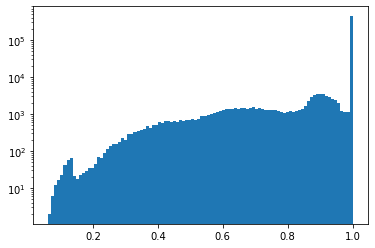

In [26]:
x=A_Ec_D/A_Ec_evt_D

plt.hist(x,100)
plt.yscale('log')

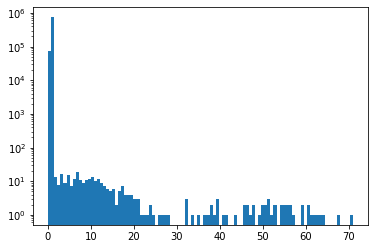

In [24]:
x=A_Ec_MC/A_Ec_evt_MC

plt.hist(x,100)
plt.yscale('log')

In [12]:
cwide_zmin = 50; cwide_zmax = 500
cwide_rmax = 180

C_basic_D       = (A_Ec_D > 0) & (A_zavg_D < 580)
C_wide_D        = C_basic_D & (A_zmin_D > cwide_zmin) & (A_zmax_D < cwide_zmax) & (A_rmax_D < cwide_rmax)

C_basic_MC       = (A_Ec_MC > 0) & (A_zavg_MC < 580)
C_wide_MC        = C_basic_MC & (A_zmin_MC > cwide_zmin) & (A_zmax_MC < cwide_zmax) & (A_rmax_MC < cwide_rmax)



/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [20]:
cwide_zmin = 50; cwide_zmax = 500
cwide_rmax = 180

C_basic_D       = (B_Ec_D > 0) & (B_zavg_D < 580)
C_wide_D        = C_basic_D & (B_zmin_D > cwide_zmin) & (B_zmax_D < cwide_zmax) & (B_rmax_D < cwide_rmax) & (B_numtrks_D > 1)

C_basic_MC       = (B_Ec_MC > 0) & (B_zavg_MC < 580)
C_wide_MC        = C_basic_MC & (B_zmin_MC > cwide_zmin) & (B_zmax_MC < cwide_zmax) & (B_rmax_MC < cwide_rmax) & (B_numtrks_MC > 1)



/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [27]:
len(B_Ec_evt_MC), len(B_Ec_MC)

(3331470, 3331470)

In [25]:
B_Ec_evt_MC[C_wide_MC][:100]

array([1.61741535, 1.61741535, 1.61741535, 1.61741535, 1.54612847,
       1.54612847, 1.54612847, 1.54612847, 1.54612847, 1.54612847,
       1.509868  , 1.509868  , 1.509868  , 1.509868  , 1.61299785,
       1.61299785, 1.61299785, 1.61299785, 1.61299785, 1.61299785,
       1.59004096, 1.59004096, 1.59004096, 1.59004096, 1.59004096,
       1.59004096, 1.59004096, 1.59004096, 1.59004096, 1.59004096,
       1.59004096, 1.59004096, 1.59004096, 1.59004096, 1.59004096,
       1.59004096, 1.59004096, 1.59004096, 1.59004096, 1.59004096,
       1.59004096, 1.59004096, 1.59004096, 1.59004096,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 1.59539509, 1.59539509, 1.59539509,
       1.59539509, 1.59539509, 1.59539509, 1.59539509, 1.59539509,
       1.59539509, 1.59539509, 1.59539509, 1.59539509, 1.59539

In [24]:
B_Ec_MC[C_wide_MC][:100]

array([0.16735032, 0.16735032, 0.16735032, 0.16735032, 1.44827002,
       0.00582974, 1.44827002, 0.00582974, 1.44827002, 0.00582974,
       1.47470594, 1.47470594, 1.47470594, 1.47470594, 0.83360712,
       0.81833468, 0.83360712, 0.81833468, 0.83360712, 0.81833468,
       0.81869047, 0.48420341, 0.15243266, 0.13471442, 1.4793315 ,
       0.02955961, 0.81869047, 0.48420341, 0.15243266, 0.13471442,
       1.4793315 , 0.02955961, 0.81869047, 0.48420341, 0.15243266,
       0.13471442, 1.4793315 , 0.02955961, 0.81869047, 0.48420341,
       0.15243266, 0.13471442, 1.4793315 , 0.02955961, 0.25431619,
       0.15996919, 0.11000859, 0.25431619, 0.15996919, 0.11000859,
       0.25431619, 0.15996919, 0.11000859, 0.25431619, 0.15996919,
       0.11000859, 0.25431619, 0.15996919, 0.11000859, 0.25431619,
       0.15996919, 0.11000859, 1.37496416, 0.23715954, 0.17858739,
       1.37496416, 0.23715954, 0.17858739, 1.37496416, 0.23715954,
       0.17858739, 1.37496416, 0.23715954, 0.17858739, 1.37496

In [14]:
A_Ec_MC[C_wide_MC]

array([0.33559773, 0.23175266, 0.24773179, ..., 1.60034771, 0.715046  ,
       1.79268217])

In [11]:
cdf[['event','evt_energy','energy']]

,event,evt_energy,energy
0,7,0.335598,0.335598
1,20,0.449683,0.449683
2,21,0.231753,0.231753
3,28,NaN,1.285731
4,35,0.247732,0.247732
...,...,...,...
322322,798000998,NaN,1.506540
322323,798000999,1.792682,1.792682
322324,798001000,1.704516,1.596031
322325,798001001,1.781510,1.589210


In [20]:
# Pre-defined cuts

cwide_zmin = 50; cwide_zmax = 500
cwide_rmax = 180

C_basic_D       = (A_Ec_D > 0) & (A_zavg_D < 580)
C_wide_D        = C_basic_D & (A_zmin_D > cwide_zmin) & (A_zmax_D < cwide_zmax) & (A_rmax_D < cwide_rmax)

C_basic_MC       = (A_Ec_MC > 0) & (A_zavg_MC < 580)
C_wide_MC        = C_basic_MC & (A_zmin_MC > cwide_zmin) & (A_zmax_MC < cwide_zmax) & (A_rmax_MC < cwide_rmax)

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


In [11]:
cdf[['event','energy','evt_energy','length']].head(20)

,event,energy,evt_energy,length
0,7,0.335598,0.335598,20.000000
1,20,0.449683,0.449683,24.142136
2,21,0.231753,0.231753,14.142136
3,28,1.285731,NaN,107.566304
4,35,0.247732,0.247732,20.000000
5,36,0.463005,0.673615,28.284271
6,40,0.235160,NaN,20.000000
7,52,0.328221,0.328221,20.000000
8,57,0.246365,0.246365,20.000000
9,61,0.221966,0.221966,10.000000


# Corrección en la energía 

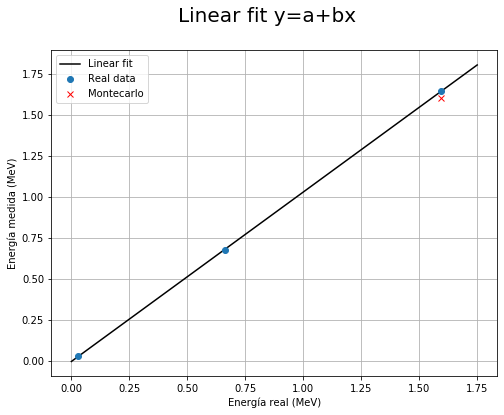

In [6]:
fig=plt.figure(1)

fig.set_figheight(6.0)
fig.set_figwidth(8.0)


def lin(x, a, b):
    y=a + b*x
    return y
    

a=  -0.0034336981763256613 ;  b=  1.0339065586034326

E_D=np.array([0.02945, 0.6775,  1.645])
E_real=np.array([0.029782, 0.662, 1.593])
DE_peak_real=1.593
DE_peak_MC=1.603

x = np.linspace(0., 1.75, 20)
plt.plot(x, lin(x,a,b), 'k-', label='Linear fit')
plt.plot(E_real, E_D, 'o', label='Real data')
plt.plot(DE_peak_real, DE_peak_MC, 'rx', label='Montecarlo')
plt.legend()
plt.grid()
plt.xlabel('Energía real (MeV)')
plt.ylabel('Energía medida (MeV)')
plt.suptitle('Linear fit y=a+bx',fontsize=20)
plt.show()

A_Ec_D_fit = (A_Ec_D-a)/b
B_Ec_D_fit = (B_Ec_D-a)/b

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher

<Figure size 576x432 with 0 Axes>

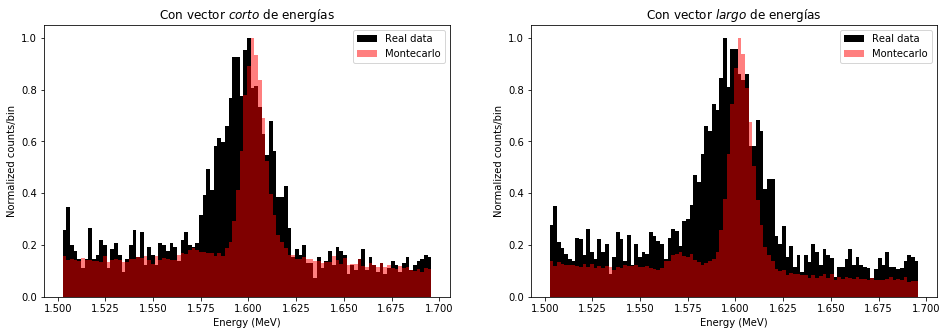

In [57]:
cwide_zmin = 50
cwide_zmax = 500
cwide_rmax = 180
E_DE_min_new=(1.55-a)/b
E_DE_max_new=(1.75-a)/b
E_DE_min=E_DE_min_new
E_DE_max=E_DE_max_new

C_basic_D       = (A_Ec_D > 0) & (A_zavg_D < 580)
C_wide_D        = C_basic_D & (A_zmin_D > cwide_zmin) & (A_zmax_D < cwide_zmax) & (A_rmax_D < cwide_rmax) 

C_basic_MC      = (A_Ec_MC > 0) & (A_zavg_MC < 580)
C_wide_MC       = C_basic_MC & (A_zmin_MC > cwide_zmin) & (A_zmax_MC < cwide_zmax) & (A_rmax_MC < cwide_rmax)


cut_DE_D = C_wide_D & (A_Ec_D_fit > E_DE_min) & (A_Ec_D_fit < E_DE_max)
cut_DE_MC = C_wide_MC & (A_Ec_MC > E_DE_min) & (A_Ec_MC < E_DE_max)


fig = plt.figure(1)
fig.set_figheight(6.0)
fig.set_figwidth(8.0)
plt.suptitle('Energía corregida con el ajuste',fontsize=20)

bins = 100
bin_lim = np.linspace(E_DE_min, E_DE_max, bins+1)
bin_center = 0.5*(bin_lim[:-1]+bin_lim[1:])
bin_width = bin_lim[1:]-bin_lim[:-1]



hist_D, _ = np.histogram(A_Ec_D_fit[cut_DE_D], bins)
hist_D_norm = hist_D/np.max(hist_D)


hist_MC, _ = np.histogram(A_Ec_MC[cut_DE_MC], bins)
hist_MC_norm = hist_MC/np.max(hist_MC)




C_basic_D       = (B_Ec_D > 0) & (B_zavg_D < 580)
C_wide_D        = C_basic_D & (B_zmin_D > cwide_zmin) & (B_zmax_D < cwide_zmax) & (B_rmax_D < cwide_rmax) 

C_basic_MC      = (B_Ec_MC > 0) & (B_zavg_MC < 580)
C_wide_MC       = C_basic_MC & (B_zmin_MC > cwide_zmin) & (B_zmax_MC < cwide_zmax) & (B_rmax_MC < cwide_rmax)


cut_DE_D = C_wide_D & (B_Ec_D_fit > E_DE_min) & (B_Ec_D_fit < E_DE_max)
cut_DE_MC = C_wide_MC & (B_Ec_MC > E_DE_min) & (B_Ec_MC < E_DE_max)



bins = 100
bin_lim = np.linspace(E_DE_min, E_DE_max, bins+1)
bin_center = 0.5*(bin_lim[:-1]+bin_lim[1:])
bin_width = bin_lim[1:]-bin_lim[:-1]



B_hist_D, _ = np.histogram(B_Ec_D_fit[cut_DE_D], bins)
B_hist_D_norm = B_hist_D/np.max(B_hist_D)


B_hist_MC, _ = np.histogram(B_Ec_MC[cut_DE_MC], bins)
B_hist_MC_norm = B_hist_MC/np.max(B_hist_MC)


fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)


axs[0].bar(bin_center, hist_D_norm, width = bin_width, align = 'center', label = 'Real data', color='k')
axs[0].bar(bin_center, hist_MC_norm, width = bin_width, align = 'center', alpha=0.5, label = 'Montecarlo', color='r')
axs[1].bar(bin_center, B_hist_D_norm, width = bin_width, align = 'center', label = 'Real data', color='k')
axs[1].bar(bin_center, B_hist_MC_norm, width = bin_width, align = 'center', alpha=0.5, label = 'Montecarlo', color='r')



axs[0].set_title('Con vector $''corto''$ de energías')
axs[1].set_title('Con vector $''largo''$ de energías')
axs[0].set_xlabel('Energy (MeV)')
axs[1].set_xlabel('Energy (MeV)')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

3 zonas: 1.500-1.560; 1.560-1.630; 1.630-1.700

# VENTANA POR DEBAJO DE PICO DOUBLE-ESCAPE

# Número de trazas por evento

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountere

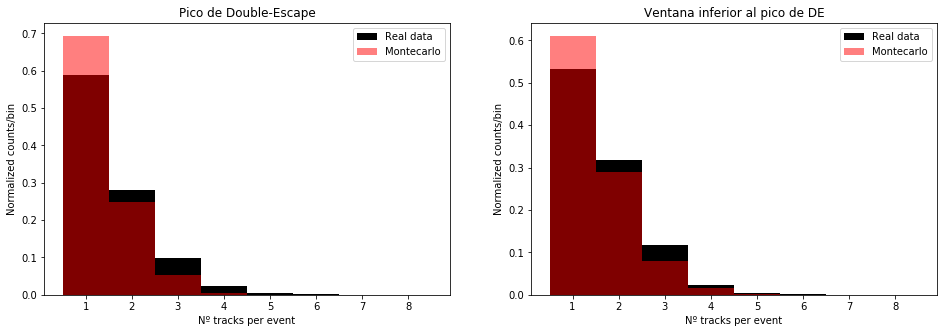

Número medio de trazas por evento en el pico (Datos)= 1.6048530282106925
Número medio de trazas por evento en el pico (MC)= 1.370930783892582
Número medio de trazas por evento por debajo del pico (Datos)= 1.6557776694295465
Número medio de trazas por evento por debajo del pico (MC)= 1.5089786367978735


In [19]:
cut_multitrks_DE_D = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.56) & (B_Ec_D_fit < 1.63)
cut_multitrks_DE_MC = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.56) & (B_Ec_MC < 1.63)

cut_multitrks_DE_D_low = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.5) & (B_Ec_D_fit < 1.56)
cut_multitrks_DE_MC_low = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.5) & (B_Ec_MC < 1.56)

fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)

axs[0].hist(B_numtrks_D[cut_multitrks_DE_D], 8, range=[0.5,8.5], color='k', label='Real data', density=True)
axs[0].hist(B_numtrks_MC[cut_multitrks_DE_MC], 8, alpha=0.5, range=[0.5,8.5], color='r', label='Montecarlo', density=True)

axs[1].hist(B_numtrks_D[cut_multitrks_DE_D_low], 8, range=[0.5,8.5], color='k', label='Real data', density=True)
axs[1].hist(B_numtrks_MC[cut_multitrks_DE_MC_low], 8, alpha=0.5, range=[0.5,8.5], color='r', label='Montecarlo', density=True)

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana inferior al pico de DE')
axs[0].set_xlabel('Nº tracks per event')
axs[1].set_xlabel('Nº tracks per event')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Número medio de trazas por evento en el pico (Datos)=', np.mean(B_numtrks_D[cut_multitrks_DE_D]))
print('Número medio de trazas por evento en el pico (MC)=', np.mean(B_numtrks_MC[cut_multitrks_DE_MC]))
print('Número medio de trazas por evento por debajo del pico (Datos)=', np.mean(B_numtrks_D[cut_multitrks_DE_D_low]))
print('Número medio de trazas por evento por debajo del pico (MC)=', np.mean(B_numtrks_MC[cut_multitrks_DE_MC_low]))

(array([5.56402960e-01, 2.93796244e-01, 1.10643142e-01, 2.82299374e-02,
       7.28514513e-03, 3.18725100e-03, 4.55321571e-04, 0.00000000e+00]), array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]), <a list of 8 Patch objects>)
(array([6.09632178e-01, 2.92873572e-01, 8.07872267e-02, 1.46703807e-02,
       1.89949084e-03, 1.33510538e-04, 3.64119650e-06, 0.00000000e+00]), array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]), <a list of 8 Patch objects>)


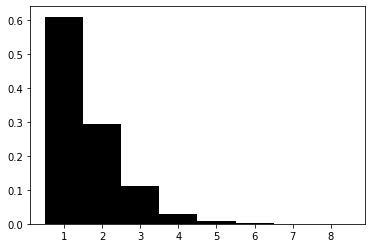

In [8]:
print(plt.hist(B_numtrks_D[cut_multitrks_DE_D_low], 8, range=[0.5,8.5], color='k', label='Real data', density=True))
print(plt.hist(B_numtrks_MC[cut_multitrks_DE_MC_low], 8, range=[0.5,8.5], color='k', label='Real data', density=True))

# Longitud de las trazas

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountere

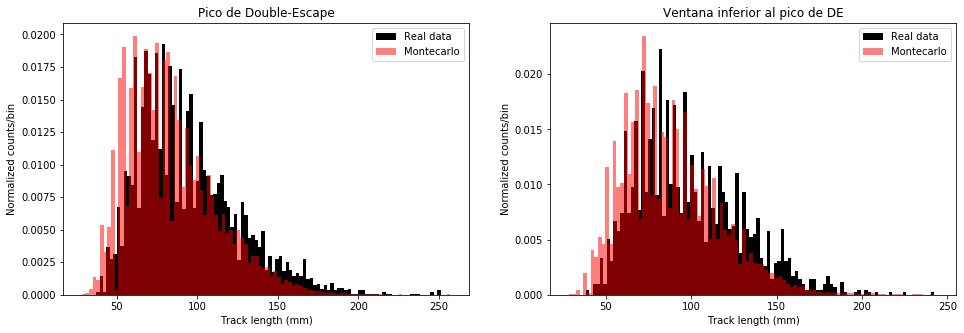

Longitud media de las trazas en el pico (Datos)= 94.25702044353143
Longitud media de las trazas en el pico (MC)= 84.18225369226678
Longitud media de las trazas por debajo del pico (Datos)= 98.93698534950656
Longitud media de las trazas por debajo del pico (MC)= 88.35741367005235


In [20]:
cut_multitrks_DE_D = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.56) & (B_Ec_D_fit < 1.63)
cut_multitrks_DE_MC = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.56) & (B_Ec_MC < 1.63)

cut_multitrks_DE_D_low = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.5) & (B_Ec_D_fit < 1.56)
cut_multitrks_DE_MC_low = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.5) & (B_Ec_MC < 1.56)

fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)

axs[0].hist(B_trklen_D[cut_multitrks_DE_D], 100, color='k', label='Real data', density=True)
axs[0].hist(B_trklen_MC[cut_multitrks_DE_MC],100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[1].hist(B_trklen_D[cut_multitrks_DE_D_low], 100, color='k', label='Real data', density=True)
axs[1].hist(B_trklen_MC[cut_multitrks_DE_MC_low], 100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana inferior al pico de DE')
axs[0].set_xlabel('Track length (mm)')
axs[1].set_xlabel('Track length (mm)')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Longitud media de las trazas en el pico (Datos)=', np.mean(B_trklen_D[cut_multitrks_DE_D]))
print('Longitud media de las trazas en el pico (MC)=', np.mean(B_trklen_MC[cut_multitrks_DE_MC]))
print('Longitud media de las trazas por debajo del pico (Datos)=', np.mean(B_trklen_D[cut_multitrks_DE_D_low]))
print('Longitud media de las trazas por debajo del pico (MC)=', np.mean(B_trklen_MC[cut_multitrks_DE_MC_low]))




# Profile: no sé hacer subplots con sns

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeW

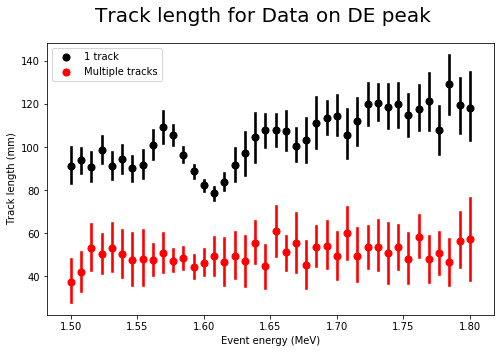

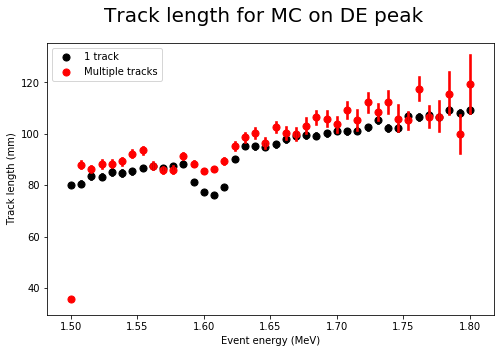

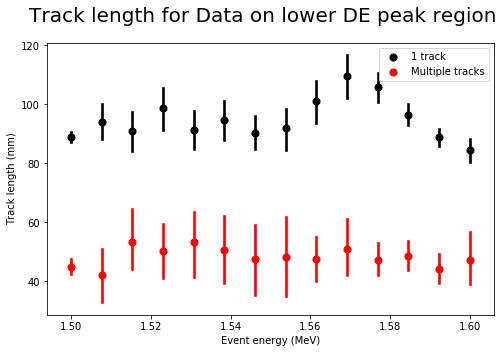

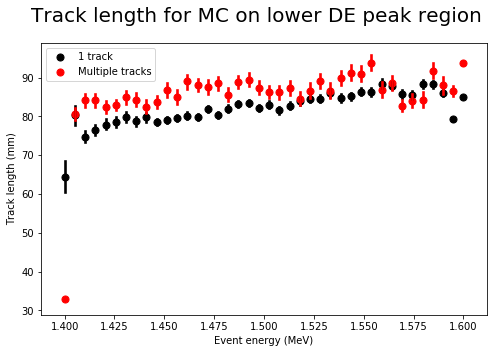

In [11]:
cwide_zmin = 50
cwide_zmax = 500
cwide_rmax = 180

C_basic_D       = (B_Ec_D > 0) & (B_zavg_D < 580)
C_wide_D        = C_basic_D & (B_zmin_D > cwide_zmin) & (B_zmax_D < cwide_zmax) & (B_rmax_D < cwide_rmax) & (B_nS1_D == 1)

C_basic_MC      = (B_Ec_MC > 0) & (B_zavg_MC < 580)
C_wide_MC       = C_basic_MC & (B_zmin_MC > cwide_zmin) & (B_zmax_MC < cwide_zmax) & (B_rmax_MC < cwide_rmax) & (B_nS1_MC == 1)

E_DE_min=1.5
E_DE_max=1.8

E_DE_min_low=1.4
E_DE_max_low=1.6

B_Ec_evt_D=(B_Ec_evt_D-a)/b
B_Ec_evt_MC=(B_Ec_evt_MC-a)/b

cuts_Evstrklen_1_D = C_wide_D & (B_numtrks_D == 1) & (B_Ec_evt_D > E_DE_min) & (B_Ec_evt_D < E_DE_max) & (B_nS2_D == 1)
cuts_Evstrklen_else_D = C_wide_D & (B_numtrks_D > 1) & (B_Ec_evt_D > E_DE_min) & (B_Ec_evt_D < E_DE_max) & (B_nS2_D == 1)

cuts_Evstrklen_1_MC = C_wide_MC & (B_numtrks_MC == 1) & (B_Ec_evt_MC > E_DE_min) & (B_Ec_evt_MC < E_DE_max) & (B_nS2_MC == 1)
cuts_Evstrklen_else_MC = C_wide_MC & (B_numtrks_MC > 1) & (B_Ec_evt_MC > E_DE_min) & (B_Ec_evt_MC < E_DE_max) & (B_nS2_MC == 1)

cuts_Evstrklen_1_D_low = C_wide_D & (B_numtrks_D == 1) & (B_Ec_evt_D > E_DE_min_low) & (B_Ec_evt_D < E_DE_max_low) & (B_nS2_D == 1)
cuts_Evstrklen_else_D_low = C_wide_D & (B_numtrks_D > 1) & (B_Ec_evt_D > E_DE_min_low) & (B_Ec_evt_D < E_DE_max_low) & (B_nS2_D == 1)

cuts_Evstrklen_1_MC_low = C_wide_MC & (B_numtrks_MC == 1) & (B_Ec_evt_MC > E_DE_min_low) & (B_Ec_evt_MC < E_DE_max_low) & (B_nS2_MC == 1)
cuts_Evstrklen_else_MC_low = C_wide_MC & (B_numtrks_MC > 1) & (B_Ec_evt_MC > E_DE_min_low) & (B_Ec_evt_MC < E_DE_max_low) & (B_nS2_MC == 1)


fig=plt.figure(1)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_1_D], y=B_trklen_D[cuts_Evstrklen_1_D], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='1 track' , color='k')
sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_else_D], y=B_trklen_D[cuts_Evstrklen_else_D], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='Multiple tracks', color='r')

plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for Data on DE peak',fontsize=20)
plt.legend()


fig=plt.figure(2)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_MC[cuts_Evstrklen_1_MC], y=B_trklen_MC[cuts_Evstrklen_1_MC], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='1 track', color='k')
sns.regplot(x=B_Ec_MC[cuts_Evstrklen_else_MC], y=B_trklen_MC[cuts_Evstrklen_else_MC], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='Multiple tracks', color='r')

plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for MC on DE peak',fontsize=20)
plt.legend()


fig=plt.figure(3)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_1_D_low], y=B_trklen_D[cuts_Evstrklen_1_D_low], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='1 track' , color='k')
sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_else_D_low], y=B_trklen_D[cuts_Evstrklen_else_D_low], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='Multiple tracks', color='r')

plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for Data on lower DE peak region',fontsize=20)
plt.legend()


fig=plt.figure(4)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_MC[cuts_Evstrklen_1_MC_low], y=B_trklen_MC[cuts_Evstrklen_1_MC_low], x_bins=np.linspace(E_DE_min_low,E_DE_max_low,40), fit_reg=None, label='1 track', color='k')
sns.regplot(x=B_Ec_MC[cuts_Evstrklen_else_MC_low], y=B_trklen_MC[cuts_Evstrklen_else_MC_low], x_bins=np.linspace(E_DE_min_low,E_DE_max_low,40), fit_reg=None, label='Multiple tracks', color='r')



plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for MC on lower DE peak region',fontsize=20)
plt.legend()

# Longitud de la traza más larga

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_

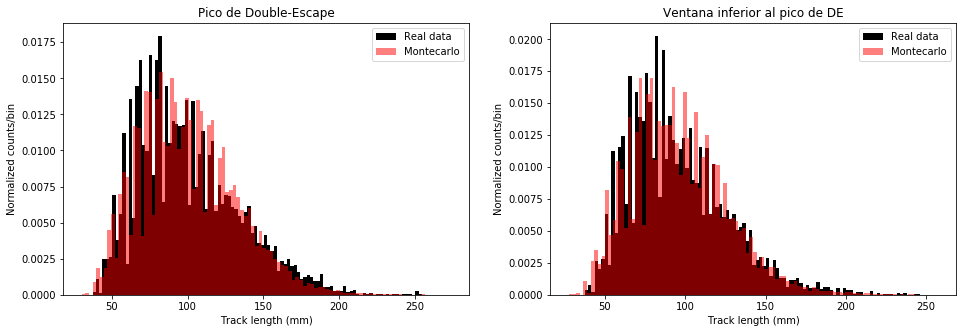

Longitud media de la traza más larga en el pico (Datos)= 100.71358378000936
Longitud media de la traza más larga en el pico (MC)= 100.68821118481061
Longitud media de la traza más larga por debajo del pico (Datos)= 95.76338992707275
Longitud media de la traza más larga por debajo del pico (MC)= 95.92698692783758


In [12]:
cut_multitrks_DE_D = (A_numtrks_D >= 1) & (A_Ec_D_fit > 1.55) & (A_Ec_D_fit < 1.75)
cut_multitrks_DE_MC = (A_numtrks_MC >= 1) & (A_Ec_MC > 1.55) & (A_Ec_MC < 1.75)

cut_multitrks_DE_D_low = (A_numtrks_D >= 1) & (A_Ec_D_fit > 1.4) & (A_Ec_D_fit < 1.6)
cut_multitrks_DE_MC_low = (A_numtrks_MC >= 1) & (A_Ec_MC > 1.4) & (A_Ec_MC < 1.6)

fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)

axs[0].hist(A_maxtrklen_D[cut_multitrks_DE_D], 100, color='k', label='Real data', density=True)
axs[0].hist(A_maxtrklen_MC[cut_multitrks_DE_MC],100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[1].hist(A_maxtrklen_D[cut_multitrks_DE_D_low], 100, color='k', label='Real data', density=True)
axs[1].hist(A_maxtrklen_MC[cut_multitrks_DE_MC_low], 100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana inferior al pico de DE')
axs[0].set_xlabel('Track length (mm)')
axs[1].set_xlabel('Track length (mm)')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Longitud media de la traza más larga en el pico (Datos)=', np.mean(A_maxtrklen_D[cut_multitrks_DE_D]))
print('Longitud media de la traza más larga en el pico (MC)=', np.mean(A_maxtrklen_MC[cut_multitrks_DE_MC]))
print('Longitud media de la traza más larga por debajo del pico (Datos)=', np.mean(A_maxtrklen_D[cut_multitrks_DE_D_low]))
print('Longitud media de la traza más larga por debajo del pico (MC)=', np.mean(A_maxtrklen_MC[cut_multitrks_DE_MC_low]))



# Nº S2

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountere

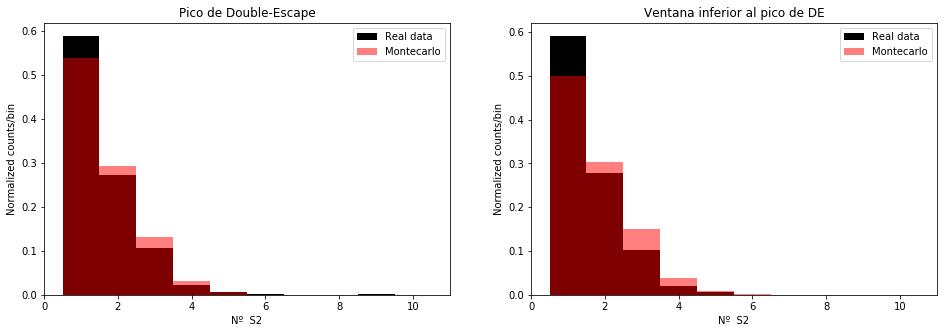

Número medio de S2 en el pico (Datos)= 1.5942608063930257
Número medio de S2 en el pico (MC)= 1.674522571612735
Número medio de S2 por debajo del pico (Datos)= 1.578030734206033
Número medio de S2 por debajo del pico (MC)= 1.753375692585917


In [13]:
cut_multitrks_DE_D = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.55) & (B_Ec_D_fit < 1.75)
cut_multitrks_DE_MC = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.55) & (B_Ec_MC < 1.75)

cut_multitrks_DE_D_low = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.4) & (B_Ec_D_fit < 1.6)
cut_multitrks_DE_MC_low = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.4) & (B_Ec_MC < 1.6)


fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)


axs[0].hist(B_nS2_D[cut_multitrks_DE_D], 10, range=[0.5,10.5], color='k', label='Real data', density=True)
axs[0].hist(B_nS2_MC[cut_multitrks_DE_MC], 10, alpha=0.5, range=[0.5,10.5], color='r', label='Montecarlo', density=True)

axs[1].hist(B_nS2_D[cut_multitrks_DE_D_low], 10, range=[0.5,10.5], color='k', label='Real data', density=True)
axs[1].hist(B_nS2_MC[cut_multitrks_DE_MC_low], 10, alpha=0.5, range=[0.5,10.5], color='r', label='Montecarlo', density=True)

plt.xlabel('Nº  S2')
plt.ylabel('Normalized counts / bin')
plt.legend() 

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana inferior al pico de DE')
axs[0].set_xlabel('Nº  S2')
axs[1].set_xlabel('Nº  S2')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Número medio de S2 en el pico (Datos)=', np.mean(B_nS2_D[cut_multitrks_DE_D]))
print('Número medio de S2 en el pico (MC)=', np.mean(B_nS2_MC[cut_multitrks_DE_MC]))
print('Número medio de S2 por debajo del pico (Datos)=', np.mean(B_nS2_D[cut_multitrks_DE_D_low]))
print('Número medio de S2 por debajo del pico (MC)=', np.mean(B_nS2_MC[cut_multitrks_DE_MC_low]))



# VENTANA POR ENCIMA DE PICO DOUBLE-ESCAPE

# Número de trazas por evento

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountere

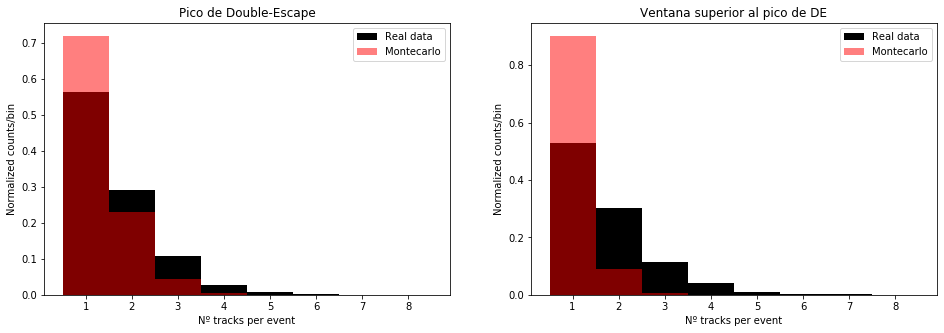

Número medio de trazas por evento en el pico (Datos)= 1.647536021310086
Número medio de trazas por evento en el pico (MC)= 1.3368762481738128
Número medio de trazas por evento por encima del pico (Datos)= 1.7422654690618762
Número medio de trazas por evento por encima del pico (MC)= 1.1055473388868347


In [14]:
cut_multitrks_DE_D = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.55) & (B_Ec_D_fit < 1.75)
cut_multitrks_DE_MC = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.55) & (B_Ec_MC < 1.75)

cut_multitrks_DE_D_up = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.7) & (B_Ec_D_fit < 1.9)
cut_multitrks_DE_MC_up = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.7) & (B_Ec_MC < 1.9)

fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)

axs[0].hist(B_numtrks_D[cut_multitrks_DE_D], 8, range=[0.5,8.5], color='k', label='Real data', density=True)
axs[0].hist(B_numtrks_MC[cut_multitrks_DE_MC], 8, alpha=0.5, range=[0.5,8.5], color='r', label='Montecarlo', density=True)

axs[1].hist(B_numtrks_D[cut_multitrks_DE_D_up], 8, range=[0.5,8.5], color='k', label='Real data', density=True)
axs[1].hist(B_numtrks_MC[cut_multitrks_DE_MC_up], 8, alpha=0.5, range=[0.5,8.5], color='r', label='Montecarlo', density=True)

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana superior al pico de DE')
axs[0].set_xlabel('Nº tracks per event')
axs[1].set_xlabel('Nº tracks per event')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Número medio de trazas por evento en el pico (Datos)=', np.mean(B_numtrks_D[cut_multitrks_DE_D]))
print('Número medio de trazas por evento en el pico (MC)=', np.mean(B_numtrks_MC[cut_multitrks_DE_MC]))
print('Número medio de trazas por evento por encima del pico (Datos)=', np.mean(B_numtrks_D[cut_multitrks_DE_D_up]))
print('Número medio de trazas por evento por encima del pico (MC)=', np.mean(B_numtrks_MC[cut_multitrks_DE_MC_up]))

# Longitud de las trazas

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountere

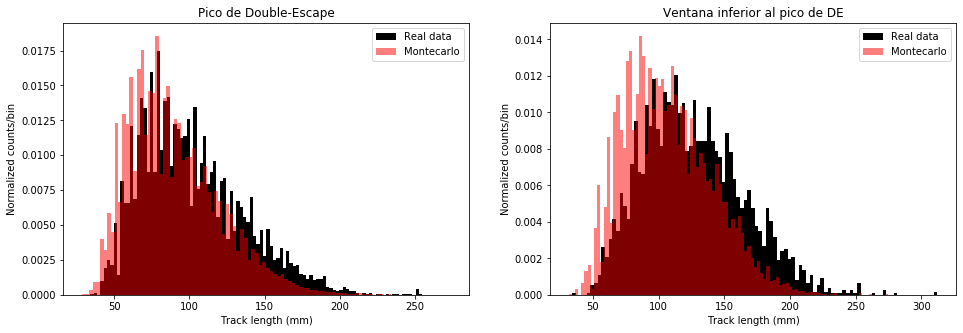

Longitud media de las trazas en el pico (Datos)= 101.48503101219097
Longitud media de las trazas en el pico (MC)= 89.89482190963338
Longitud media de las trazas por encima del pico (Datos)= 125.96922932423304
Longitud media de las trazas por encima del pico (MC)= 107.11340974342974


In [15]:
cut_multitrks_DE_D = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.55) & (B_Ec_D_fit < 1.75)
cut_multitrks_DE_MC = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.55) & (B_Ec_MC < 1.75)

cut_multitrks_DE_D_up = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.7) & (B_Ec_D_fit < 1.9)
cut_multitrks_DE_MC_up = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.7) & (B_Ec_MC < 1.9)

fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)

axs[0].hist(B_trklen_D[cut_multitrks_DE_D], 100, color='k', label='Real data', density=True)
axs[0].hist(B_trklen_MC[cut_multitrks_DE_MC],100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[1].hist(B_trklen_D[cut_multitrks_DE_D_up], 100, color='k', label='Real data', density=True)
axs[1].hist(B_trklen_MC[cut_multitrks_DE_MC_up], 100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana inferior al pico de DE')
axs[0].set_xlabel('Track length (mm)')
axs[1].set_xlabel('Track length (mm)')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Longitud media de las trazas en el pico (Datos)=', np.mean(B_trklen_D[cut_multitrks_DE_D]))
print('Longitud media de las trazas en el pico (MC)=', np.mean(B_trklen_MC[cut_multitrks_DE_MC]))
print('Longitud media de las trazas por encima del pico (Datos)=', np.mean(B_trklen_D[cut_multitrks_DE_D_up]))
print('Longitud media de las trazas por encima del pico (MC)=', np.mean(B_trklen_MC[cut_multitrks_DE_MC_up]))




# Profile: no sé hacer subplots con sns

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/home/carlo

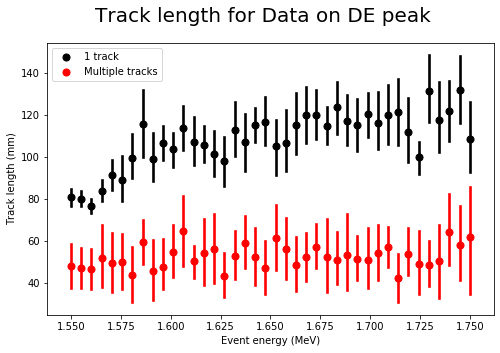

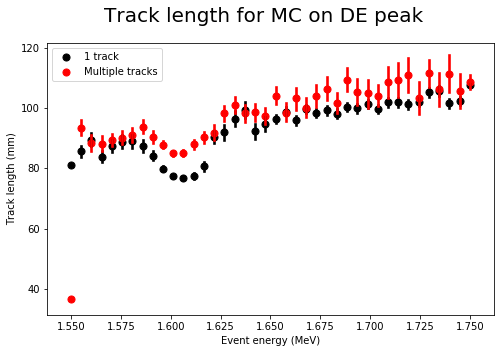

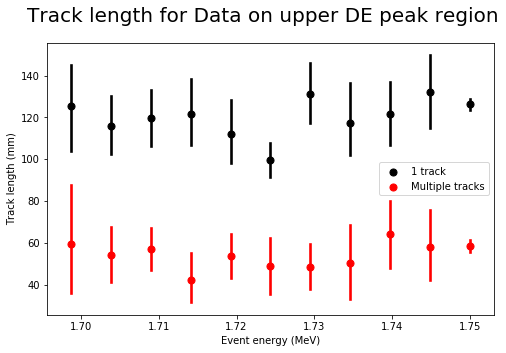

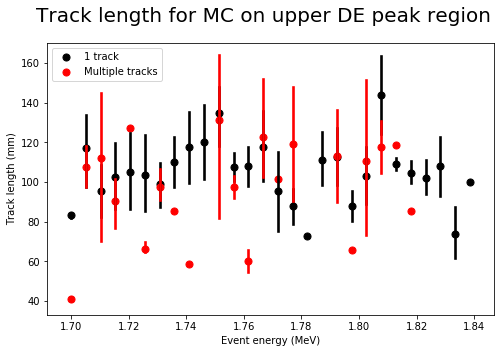

In [16]:
cwide_zmin = 50; cwide_zmax = 500
cwide_rmax = 180

C_basic_D       = (B_Ec_D > 0) & (B_zavg_D < 580)
C_wide_D        = C_basic_D & (B_zmin_D > cwide_zmin) & (B_zmax_D < cwide_zmax) & (B_rmax_D < cwide_rmax) & (B_nS1_D == 1)

C_basic_MC      = (B_Ec_MC > 0) & (B_zavg_MC < 580)
C_wide_MC       = C_basic_MC & (B_zmin_MC > cwide_zmin) & (B_zmax_MC < cwide_zmax) & (B_rmax_MC < cwide_rmax) & (B_nS1_MC == 1)

E_DE_min=1.55
E_DE_max=1.75

E_DE_min_low=1.7
E_DE_max_low=1.9

B_Ec_evt_D=(B_Ec_evt_D-a)/b
B_Ec_evt_MC=(B_Ec_evt_MC-a)/b

cuts_Evstrklen_1_D = C_wide_D & (B_numtrks_D == 1) & (B_Ec_evt_D > E_DE_min) & (B_Ec_evt_D < E_DE_max) & (B_nS2_D == 1)
cuts_Evstrklen_else_D = C_wide_D & (B_numtrks_D > 1) & (B_Ec_evt_D > E_DE_min) & (B_Ec_evt_D < E_DE_max) & (B_nS2_D == 1)

cuts_Evstrklen_1_MC = C_wide_MC & (B_numtrks_MC == 1) & (B_Ec_evt_MC > E_DE_min) & (B_Ec_evt_MC < E_DE_max) & (B_nS2_MC == 1)
cuts_Evstrklen_else_MC = C_wide_MC & (B_numtrks_MC > 1) & (B_Ec_evt_MC > E_DE_min) & (B_Ec_evt_MC < E_DE_max) & (B_nS2_MC == 1)

cuts_Evstrklen_1_D_low = C_wide_D & (B_numtrks_D == 1) & (B_Ec_evt_D > E_DE_min_low) & (B_Ec_evt_D < E_DE_max_low) & (B_nS2_D == 1)
cuts_Evstrklen_else_D_low = C_wide_D & (B_numtrks_D > 1) & (B_Ec_evt_D > E_DE_min_low) & (B_Ec_evt_D < E_DE_max_low) & (B_nS2_D == 1)

cuts_Evstrklen_1_MC_low = C_wide_MC & (B_numtrks_MC == 1) & (B_Ec_evt_MC > E_DE_min_low) & (B_Ec_evt_MC < E_DE_max_low) & (B_nS2_MC == 1)
cuts_Evstrklen_else_MC_low = C_wide_MC & (B_numtrks_MC > 1) & (B_Ec_evt_MC > E_DE_min_low) & (B_Ec_evt_MC < E_DE_max_low) & (B_nS2_MC == 1)


fig=plt.figure(1)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_1_D], y=B_trklen_D[cuts_Evstrklen_1_D], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='1 track' , color='k')
sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_else_D], y=B_trklen_D[cuts_Evstrklen_else_D], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='Multiple tracks', color='r')

plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for Data on DE peak',fontsize=20)
plt.legend()


fig=plt.figure(2)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_MC[cuts_Evstrklen_1_MC], y=B_trklen_MC[cuts_Evstrklen_1_MC], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='1 track', color='k')
sns.regplot(x=B_Ec_MC[cuts_Evstrklen_else_MC], y=B_trklen_MC[cuts_Evstrklen_else_MC], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='Multiple tracks', color='r')

plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for MC on DE peak',fontsize=20)
plt.legend()


fig=plt.figure(3)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_1_D_low], y=B_trklen_D[cuts_Evstrklen_1_D_low], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='1 track' , color='k')
sns.regplot(x=B_Ec_evt_D[cuts_Evstrklen_else_D_low], y=B_trklen_D[cuts_Evstrklen_else_D_low], x_bins=np.linspace(E_DE_min,E_DE_max,40), fit_reg=None, label='Multiple tracks', color='r')

plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for Data on upper DE peak region',fontsize=20)
plt.legend()


fig=plt.figure(4)

fig.set_figheight(5.0)
fig.set_figwidth(8.0)

sns.regplot(x=B_Ec_MC[cuts_Evstrklen_1_MC_low], y=B_trklen_MC[cuts_Evstrklen_1_MC_low], x_bins=np.linspace(E_DE_min_low,E_DE_max_low,40), fit_reg=None, label='1 track', color='k')
sns.regplot(x=B_Ec_MC[cuts_Evstrklen_else_MC_low], y=B_trklen_MC[cuts_Evstrklen_else_MC_low], x_bins=np.linspace(E_DE_min_low,E_DE_max_low,40), fit_reg=None, label='Multiple tracks', color='r')



plt.xlabel("Event energy (MeV)")
plt.ylabel("Track length (mm)")
plt.suptitle('Track length for MC on upper DE peak region',fontsize=20)
plt.legend()

# Longitud de la traza más larga

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_

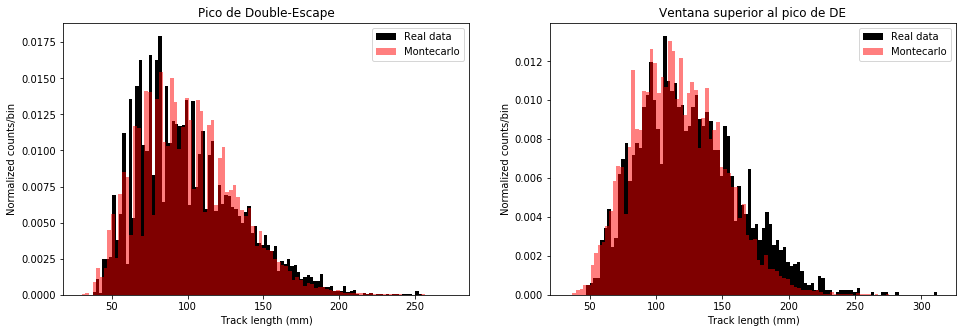

Longitud media de la traza más larga en el pico (Datos)= 100.71358378000936
Longitud media de la traza más larga en el pico (MC)= 100.68821118481061
Longitud media de la traza más larga por encima del pico (Datos)= 125.2032855460046
Longitud media de la traza más larga por encima del pico (MC)= 117.01102422625657


In [17]:
cut_multitrks_DE_D = (A_numtrks_D >= 1) & (A_Ec_D_fit > 1.55) & (A_Ec_D_fit < 1.75)
cut_multitrks_DE_MC = (A_numtrks_MC >= 1) & (A_Ec_MC > 1.55) & (A_Ec_MC < 1.75)

cut_multitrks_DE_D_low = (A_numtrks_D >= 1) & (A_Ec_D_fit > 1.7) & (A_Ec_D_fit < 1.9)
cut_multitrks_DE_MC_low = (A_numtrks_MC >= 1) & (A_Ec_MC > 1.7) & (A_Ec_MC < 1.9)

fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)

axs[0].hist(A_maxtrklen_D[cut_multitrks_DE_D], 100, color='k', label='Real data', density=True)
axs[0].hist(A_maxtrklen_MC[cut_multitrks_DE_MC],100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[1].hist(A_maxtrklen_D[cut_multitrks_DE_D_low], 100, color='k', label='Real data', density=True)
axs[1].hist(A_maxtrklen_MC[cut_multitrks_DE_MC_low], 100, alpha=0.5, color='r', label='Montecarlo', density=True)

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana superior al pico de DE')
axs[0].set_xlabel('Track length (mm)')
axs[1].set_xlabel('Track length (mm)')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Longitud media de la traza más larga en el pico (Datos)=', np.mean(A_maxtrklen_D[cut_multitrks_DE_D]))
print('Longitud media de la traza más larga en el pico (MC)=', np.mean(A_maxtrklen_MC[cut_multitrks_DE_MC]))
print('Longitud media de la traza más larga por encima del pico (Datos)=', np.mean(A_maxtrklen_D[cut_multitrks_DE_D_low]))
print('Longitud media de la traza más larga por encima del pico (MC)=', np.mean(A_maxtrklen_MC[cut_multitrks_DE_MC_low]))



# Nº S2

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountere

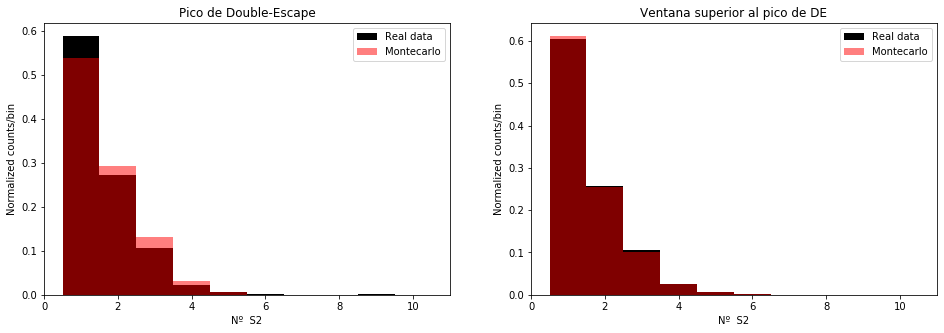

Número medio de S2 por evento en el pico (Datos)= 1.5942608063930257
Número medio de S2 por evento en el pico (MC)= 1.674522571612735
Número medio de S2 por evento por encima del pico (Datos)= 1.5798403193612773
Número medio de S2 por evento por encima del pico (MC)= 1.5634991408747851


In [18]:
cut_multitrks_DE_D = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.55) & (B_Ec_D_fit < 1.75)
cut_multitrks_DE_MC = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.55) & (B_Ec_MC < 1.75)

cut_multitrks_DE_D_low = (B_numtrks_D >= 1) & (B_Ec_D_fit > 1.7) & (B_Ec_D_fit < 1.9)
cut_multitrks_DE_MC_low = (B_numtrks_MC >= 1) & (B_Ec_MC > 1.7) & (B_Ec_MC < 1.9)


fig, axs = plt.subplots(1,2)

fig.set_figheight(5.0)
fig.set_figwidth(16.0)


axs[0].hist(B_nS2_D[cut_multitrks_DE_D], 10, range=[0.5,10.5], color='k', label='Real data', density=True)
axs[0].hist(B_nS2_MC[cut_multitrks_DE_MC], 10, alpha=0.5, range=[0.5,10.5], color='r', label='Montecarlo', density=True)

axs[1].hist(B_nS2_D[cut_multitrks_DE_D_low], 10, range=[0.5,10.5], color='k', label='Real data', density=True)
axs[1].hist(B_nS2_MC[cut_multitrks_DE_MC_low], 10, alpha=0.5, range=[0.5,10.5], color='r', label='Montecarlo', density=True)

plt.xlabel('Nº  S2')
plt.ylabel('Normalized counts / bin')
plt.legend() 

axs[0].set_title('Pico de Double-Escape')
axs[1].set_title('Ventana superior al pico de DE')
axs[0].set_xlabel('Nº  S2')
axs[1].set_xlabel('Nº  S2')
axs[1].set_ylabel('Normalized counts/bin')
axs[0].set_ylabel('Normalized counts/bin')
axs[0].legend()
axs[1].legend()
plt.show()

print('Número medio de S2 por evento en el pico (Datos)=', np.mean(B_nS2_D[cut_multitrks_DE_D]))
print('Número medio de S2 por evento en el pico (MC)=', np.mean(B_nS2_MC[cut_multitrks_DE_MC]))
print('Número medio de S2 por evento por encima del pico (Datos)=', np.mean(B_nS2_D[cut_multitrks_DE_D_low]))
print('Número medio de S2 por evento por encima del pico (MC)=', np.mean(B_nS2_MC[cut_multitrks_DE_MC_low]))

In [8]:
len(A_Ec_D)

596443

In [9]:
len(A_Ec_evt_D)

596443